<a href="https://colab.research.google.com/github/jaehakimm/Langgraph/blob/main/LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langchain_community tavily-python

In [ ]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

OPENAI_API_KEY: ··········


In [ ]:
from langchain_openai import ChatOpenAI

gpt4omini_chat = ChatOpenAI(model="gpt-4o-mini", temperature=0)
gpt35_chat = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

In [ ]:
from langchain_core.messages import HumanMessage

msg = HumanMessage(content="Hello world", name="kwan")
gpt35_chat([msg])

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 11, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-7173057f-6bc4-47ee-a552-f71ef2c3c394-0', usage_metadata={'input_tokens': 11, 'output_tokens': 10, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:
_set_env("TAVILY_API_KEY")

TAVILY_API_KEY: ··········


In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
tavilysearch = TavilySearchResults(maxresult=2)
searchdoc = tavilysearch.invoke("what is agentic ai")


In [ ]:
searchdoc

[{'url': 'https://www.techtarget.com/searchenterpriseai/definition/agentic-AI',
  'content': 'What Is Agentic AI? What is agentic AI? Agentic AI refers to artificial intelligence systems that are capable of autonomous action and decision-making. Even if agentic AI systems are guided by goals that humans initially define, they can act alone and are capable of free-form interactions with the real world, e.g., robotics, or with virtual environments, e.g., simulations. Because agentic AI systems dynamically change their behavior when their environment changes, they could handle new or ambiguous information without having to turn to a human for guidance. Complex agentic AI systems that require extensive computational resources could consume significant amounts of energy, resulting in environmental damage and high operational costs.'},
 {'url': 'https://www.rpatech.ai/agentic-ai/',
  'content': 'What is Agentic AI? Agentic AI refers to intelligent systems capable of autonomous action, decisi

# **Module 1 **

**LangGraph Arcademy**

# Simple Graph

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langgraph

# State

First define a state of Graph
For ? = input schema of workflow of graph, edge, node
use Typedict class from Python Typing module as Schema

In [ ]:
from typing_extensions import TypedDict

class state(TypedDict):
  graph_state: str

# Node

node = python function.. So the first position of Argument is State that define above. The reason is state is a typedict with Schema, all node can access the key graph_state with state['graph_state']

each node return a new value of the state in key graph_state

**important**

By default a new value return by each node  will overried the previouse state value

In [ ]:
def node1 (state):
  print("node1------------------")
  return {"graph_state": state['graph_state']+"ฉันนั้น"}

def node2 (state):
  print("node2------------------")
  return {"graph_state":state['graph_state']+"สบายดี"}

def node3 (state):
  print("node3------------------")
  return{"graph_state":state['graph_state']+"ไม่สบาย"}


# **Edge**
Edge = connect to node

normal edge = normal edge always work like this node 1 => node 2

condition edge = want to customize or optional route between node

condition edge are implement as function  the return next node

In [ ]:
import random
from typing import Literal

def decide_mood(state) -> Literal["node2", "node3"]:

    # Often, we will use state to decide on the next node to visit
    user_input = state['graph_state']

    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node2"

    # 50% of the time, we return Node 3
    return "node3"

**Graph Construction**

from the all component that created State,node, edge . From now will build Graph

use StateGraph class is the Graphclass that have to use

1. initialize a StateGraph with the State class we defined
2. add our nodes and edges.
3. use the START Node, a special node that sends user input to the graph, to indicate where to start our graph
4. END Node is a special node that represents a terminal node

last, compile our graph to perform a few basic checks on the graph structure.


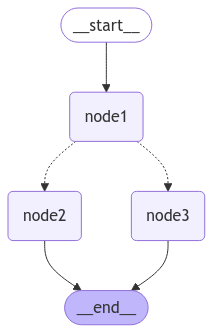

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

#initialize a StateGraph with the State class we defined
builder = StateGraph(state)
#add our nodes and edges.
builder.add_node("node1", node1)
builder.add_node("node2", node2)
builder.add_node("node3", node3)
# use the START Node, a special node that sends user input to the graph, to indicate where to start our graph
builder.add_edge(START, "node1")
builder.add_conditional_edges("node1", decide_mood)
builder.add_edge("node2", END)
builder.add_edge("node3", END)

#Add
graph = builder.compile()
#view
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"graph_state" : "สวัสดี ฉันชื่อขวัญ"})

node1------------------
node2------------------


{'graph_state': 'สวัสดี ฉันชื่อขวัญฉันนั้นสบายดี'}



---



# **Chain**
built a simple graph with nodes, normal edges, and conditional edges

# **Message**

Chat model llm can use Message which capture for different role within conversation, Langchain also support massage type (HumanMessage, AI Message, SystemMessage, ToolMessage) All type is define or represent a message from the user, from chat model, for the chat model to instruct behavior, and from a tool call.



---

Let's create a list of messages.

Each message can be supplied with a few things:

content - content of the message

*   content - content of the message
*   name - optionally, a message author
*   response_metadata - optionally, a dict of metadata (e.g., often populated by model provider for AIMessages)


In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph

In [2]:
from pprint import pprint
from langchain_core.messages import HumanMessage, AIMessage

In [5]:
message = [AIMessage(content=f"Thailand is capital city is Bangkok", name="model")]
message.append(HumanMessage(content="yes, Bangkok", name="kwan"))
message.append(AIMessage(content=f"Is it Bangkok ? not Chiang Mai", name="model"))
message.append(HumanMessage(content="no Chiang Mai, just provice in Thailand", name="kwan"))
message.append(AIMessage(content=f"Thanks for good information", name="model"))

for m in message:
  m.pretty_print()

================================== Ai Message ==================================
Name: model

Thailand is capital city is Bangkok
================================ Human Message =================================
Name: kwan

yes, Bangkok
================================== Ai Message ==================================
Name: model

Is it Bangkok ? not Chiang Mai
================================ Human Message =================================
Name: kwan

no Chiang Mai, just provice in Thailand
================================== Ai Message ==================================
Name: model

Thanks for good information


# Chat Model

Chat model can use all type message that we mention before, let's do it +++++++


In [6]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

OPENAI_API_KEY: ··········


Load chat model and invoke with list message that i created before

In [13]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini")
result = llm.invoke(message)
type(result)

langchain_core.messages.ai.AIMessage

In [14]:
result

AIMessage(content="You're welcome! If you have any more questions about Thailand or anything else, feel free to ask!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 61, 'total_tokens': 82, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_72ed7ab54c', 'finish_reason': 'stop', 'logprobs': None}, id='run-14c91e3c-2db4-44c9-88df-592e993f609e-0', usage_metadata={'input_tokens': 61, 'output_tokens': 21, 'total_tokens': 82, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [15]:
result.response_metadata

{'token_usage': {'completion_tokens': 21,
  'prompt_tokens': 61,
  'total_tokens': 82,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-mini-2024-07-18',
 'system_fingerprint': 'fp_72ed7ab54c',
 'finish_reason': 'stop',
 'logprobs': None}

# Tool

Tool is magic item for model, model can interact with external system data, source etc.External system often require in schema or payload rather than natural language.

So when i want to blind an API, for example, as a tool i give a model to know an input schema

** Model will choose tool from nature language that input from user, and model will return an output following tool's schema

In [16]:
#simply pass any Python function into ChatModel.bind_tools(function).

In [19]:
def plus (a: int, b:int) -> int:
    """plus a and b.

    Args:
        a: first int
        b: second int
    """
    return a+b

llm_with_tool = llm.bind_tools([plus])

from Now if i passed an input "what is 5 plus 8 ?"

will see tool call return


The tool call has specific arguments that match the input schema of our function along with the name of the function to call.

{'arguments': '{"a":5,"b":8}', 'name': 'plus'}

In [20]:
tool_call = llm_with_tool.invoke([HumanMessage(content="What is 5 plus 8 ?",name="kwan")])

In [21]:
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_VpyNjWaFB3yVOdQbU1o8I4uG', 'function': {'arguments': '{"a":5,"b":8}', 'name': 'plus'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 63, 'total_tokens': 81, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_bd83329f63', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-196cb269-3ee2-4563-8602-256760d2ecab-0', tool_calls=[{'name': 'plus', 'args': {'a': 5, 'b': 8}, 'id': 'call_VpyNjWaFB3yVOdQbU1o8I4uG', 'type': 'tool_call'}], usage_metadata={'input_tokens': 63, 'output_tokens': 18, 'total_tokens': 81, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [22]:
tool_call.additional_kwargs['tool_calls']

[{'id': 'call_VpyNjWaFB3yVOdQbU1o8I4uG',
  'function': {'arguments': '{"a":5,"b":8}', 'name': 'plus'},
  'type': 'function'}]

# Using messages as state

from first about LangGraph now i can use message in our graph state.
Let's Define our state, MessageState as Typedict with a singlekey:message

Message is a simple list that we define before (Bangkok is capital city in Thailand )


In [23]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class MessagesState(TypedDict):
  message : list[AnyMessage]

# Reducers

Problem Alert !!!!!!!!!!!!!!


As discuss before each node will return a new value for our state key messages.

But, this new value will will override the prior messages value.

As our graph runs, want to append messages to to our messages state key.

#use reducer functions address this to fix this problem ...

Reducers allow to specify how state updates are performed

If no reducer function is specified, then it is assumed that updates to the key should override it as before.

But, to append messages, we can use the pre-built add_messages reducer.

This ensures that any messages are appended to the existing list of messages.

An annotate simply need to annotate our messages key with the add_messages reducer function as metadata.

In [24]:
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
  message : Annotated[list[AnyMessage], add_messages]

Since have list of message in graph state is common, LangGraph has pre-built MessageState

Let's see what is in MessageState:


*   With a pre-build single messages key
*   This is a list of AnyMessage objects
*   It uses the add_messages reducer


Usually use MessagesState because it is less verbose than defining a custom TypedDict, as shown above.

In [ ]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState)
  # Add any keys needed beyond messages, which is pre-built
  pass

To go a bit deeper, to can see how the add_messages reducer works in isolation.

In [26]:
initial_messages = [AIMessage(content=f"Hi how can i assistant you ?", name="model"),
                    HumanMessage(content="Hi, i'm looking for information to make a trip for vacation in Thailand", name="kwan")]

#new message add
new_message = AIMessage(content="Sure, i will looking for information about your trip. How many day of your trip", model="model")

#test
add_messages(initial_messages, new_message)

[AIMessage(content='Hi how can i assistant you ?', additional_kwargs={}, response_metadata={}, name='model', id='576078f2-19e1-4885-b8d4-e95eac8d2ac2'),
 HumanMessage(content="Hi, i'm looking for information to make a trip for vacation in Thailand", additional_kwargs={}, response_metadata={}, name='kwan', id='ac5eaa0c-fab3-4ccb-974d-823ca8c48563'),
 AIMessage(content='Sure, i will looking for information about your trip. How many day of your trip', additional_kwargs={}, response_metadata={}, id='95b12b6f-28cc-4bbf-84a4-1c67974c334c', model='model')]

# Our graph

Now, lets use MessagesState with a graph.

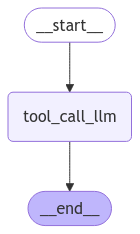

In [30]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

#node
def tool_call_llm (state: MessagesState):
    return {"message" : llm_with_tool.invoke(state['message'])}

#build Graph
builder = StateGraph(MessagesState)
builder.add_node("tool_call_llm", tool_call_llm)
builder.add_edge(START, "tool_call_llm")
builder.add_edge("tool_call_llm", END)
graph = builder.compile()


display(Image(graph.get_graph().draw_mermaid_png()))

In [33]:
#If pass in Hello!, the LLM responds without any tool calls.
message = graph.invoke({"message" : [HumanMessage(content="Hello!")]})
for m in message['message']:
  m.pretty_print()

================================ Human Message =================================

Hello!
================================== Ai Message ==================================

Hello! How can I assist you today?


In [34]:
#The LLM chooses to use a tool when it determines that the input or task requires the functionality provided by that tool.
message = graph.invoke({"message" : [HumanMessage(content="what is 48 plus 27")]})
for m in message['message']:
  m.pretty_print()

================================ Human Message =================================

what is 48 plus 27
================================== Ai Message ==================================
Tool Calls:
  plus (call_0hOwGn22mV5Dh3vmHInTXKKM)
 Call ID: call_0hOwGn22mV5Dh3vmHInTXKKM
  Args:
    a: 48
    b: 27
